![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/Question_Pair_Classification.ipynb)


# [Question Pair Classifier](https://nlp.johnsnowlabs.com/2021/08/13/classifierdl_electra_questionpair_en.html)


Identifies whether two question sentences are semantically repetitive or different.


It can be used to classify similar questions therefore automatically showing answers to previously answered questions therefore people will get answers quicker
##How to Use

* The model is trained with `en.embed_sentence.electra_large_uncased` embeddings therefore the same embeddings should be used in the prediction pipeline.

* The question pairs should be identified with “q1” and “q2” in the text. The input text format should be as follows : `text = "q1: What is your name? q2: Who are you?"`

<br>

This model can be used to predict the following news categories 
`almost_same`, `not_same`

<br>




The data Source used to train this can be found [here](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs)

<br>

##Benchmark on Dataset 
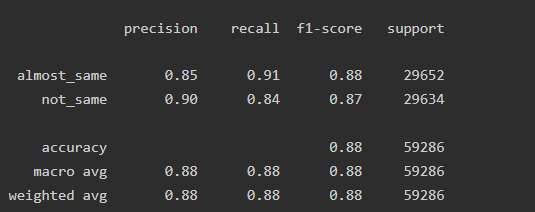

##1.Setup Java 8 and NLU

In [ ]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh -O - | bash
import nlu

--2022-05-19 21:04:15--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2022-05-19 21:04:15 (36.5 MB/s) - written to stdout [1665/1665]

Installing  NLU 3.4.4rc1 with  PySpark 3.0.3 and Spark NLP 3.4.3 for Google Colab ...
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/

##2.Load the mdoel and make Sample Predictions 

In [ ]:
pipeline = nlu.load('en.classify.questionpair')
pipeline.predict("q1: What is your favorite movie? q2: Which movie do you like most?",output_level = 'document')

classifierdl_electra_questionpair download started this may take some time.
Approximate size to download 22.7 MB
[OK!]
sent_electra_large_uncased download started this may take some time.
Approximate size to download 1.2 GB
[OK!]


,document,questionpair,questionpair_confidence_confidence,sentence_embedding_sent_electra_large_uncased
0,q1: What is your favorite movie? q2: Which mov...,almost_same,1.0,"[0.1028885468840599, 0.09209786355495453, -0.0..."


##3.Define Sample Sentences

In [ ]:
sample_sentences = [
"q1: What is your favorite movie? q2: Which movie do you like most?",
"q1: What is your favorite movie? q2: Which movie genre would you like to watch?",
"q1: Are you hungry? q2: You feel like eating?",
"q1: what do we have for dinner? q2: What are we going to eat tonight?"
]

##4.Predict on Sample Sentences

In [ ]:
pipeline.predict(sample_sentences,output_level = 'document')

,document,questionpair,questionpair_confidence_confidence,sentence_embedding_sent_electra_large_uncased
0,q1: What is your favorite movie? q2: Which mov...,almost_same,1.0,"[[0.05963423475623131, 0.05926075577735901, -0..."
1,q1: What is your favorite movie? q2: Which mov...,not_same,0.690603,"[[0.08518768846988678, 0.046159692108631134, -..."
2,q1: Are you hungry? q2: You feel like eating?,almost_same,1.0,"[[-0.023364093154668808, -0.046164620667696, 0..."
3,q1: what do we have for dinner? q2: What are w...,almost_same,0.909598,"[[0.09144271165132523, 0.1139305904507637, 0.0..."


##5.Take a look at the parmaters of the pipeline

In [ ]:
pipeline.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['classifier_dl@sent_electra_large_uncased'] has settable params:
component_list['classifier_dl@sent_electra_large_uncased'].setClasses(['almost_same', 'not_same'])  | Info: get the tags used to trained this ClassifierDLModel | Currently set to : ['almost_same', 'not_same']
component_list['classifier_dl@sent_electra_large_uncased'].setStorageRef('sent_electra_large_uncased')  | Info: unique reference name for identification | Currently set to : sent_electra_large_uncased
>>> component_list['bert_sentence_embeddings@sent_electra_large_uncased'] has settable params:
component_list['bert_sentence_embeddings@sent_electra_large_uncased'].setBatchSize(8)  | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_electra_large_uncased'].setIsLong(False)  | Info: Use Long type instead of Int type for inputs buffer - Some Bert models requir

Looking Good! Let's test this model on a labelled dataset to see how it performs 

##6.Download Data

we are going to test the model on [this](https://www.kaggle.com/datasets/quora/question-pairs-dataset) dataset 

Quora's first public dataset is related to the problem of identifying duplicate questions. At Quora, an important product principle is that there should be a single question page for each logically distinct question. For example, the queries “What is the most populous state in the USA?” and “Which state in the United States has the most people?” should not exist separately on Quora because the intent behind both is identical. Having a canonical page for each logically distinct query makes knowledge-sharing more efficient in many ways: for example, knowledge seekers can access all the answers to a question in a single location, and writers can reach a larger readership than if that audience was divided amongst several pages.

The dataset is based on actual data from Quora and will give anyone the opportunity to train and test models of semantic equivalence.


In [ ]:
!wget http://ckl-it.de/wp-content/uploads/2022/05/questions_pair_data-1.csv

--2022-05-19 21:33:53--  http://ckl-it.de/wp-content/uploads/2022/05/questions_pair_data-1.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57120912 (54M) [text/csv]
Saving to: ‘questions_pair_data-1.csv’

questions_pair_data 100%[===================>]  54.47M  17.5MB/s    in 3.9s    

2022-05-19 21:33:58 (14.1 MB/s) - ‘questions_pair_data-1.csv’ saved [57120912/57120912]



In [ ]:
import pandas  as pd 
df = pd.read_csv("questions_pair_data-1.csv")
df

,text,y
0,q1: What is the step by step guide to invest i...,not_same
1,q1: What is the story of Kohinoor (Koh-i-Noor)...,not_same
2,q1: How can I increase the speed of my interne...,not_same
3,q1: Why am I mentally very lonely? How can I s...,not_same
4,"q1: Which one dissolve in water quikly sugar, ...",not_same
...,...,...
404346,q1: How many keywords are there in the Racket ...,not_same
404347,q1: Do you believe there is life after death? ...,almost_same
404348,q1: What is one coin? q2: What's this coin?,not_same
404349,q1: What is the approx annual cost of living w...,not_same


Let's take  a Peek at the distribution of the labels 

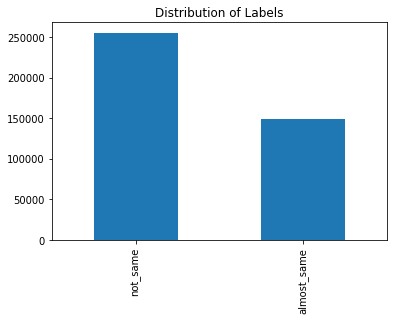

In [ ]:
df.y.value_counts().plot.bar(title='Distribution of Labels')

##7.Make Predictions with the model

In [ ]:
# The dataset is very large so we only take the first 15000 rows
df = df.iloc[:15000]

In [ ]:
predctions = pipeline.predict(df,output_level = 'document')

In [ ]:
predctions = predctions.dropna(subset = ['questionpair'])

In [ ]:
predctions

,document,questionpair,questionpair_confidence_confidence,sentence_embedding_sent_electra_large_uncased,text,y
0,q1: What is the step by step guide to invest i...,not_same,1.0,"[[-0.14823496341705322, -0.20211371779441833, ...",q1: What is the step by step guide to invest i...,not_same
1,q1: What is the story of Kohinoor (Koh-i-Noor)...,not_same,0.999998,"[[0.10479416698217392, -0.07261374592781067, 0...",q1: What is the story of Kohinoor (Koh-i-Noor)...,not_same
2,q1: How can I increase the speed of my interne...,almost_same,1.0,"[[-0.07979179173707962, 0.046571265906095505, ...",q1: How can I increase the speed of my interne...,not_same
3,q1: Why am I mentally very lonely? How can I s...,not_same,1.0,"[[-0.0022265498992055655, -0.04372467845678329...",q1: Why am I mentally very lonely? How can I s...,not_same
4,"q1: Which one dissolve in water quikly sugar, ...",not_same,1.0,"[[-0.08860134333372116, 0.0703229010105133, 0....","q1: Which one dissolve in water quikly sugar, ...",not_same
...,...,...,...,...,...,...
14995,q1: What strikes first time visitors as specia...,not_same,1.0,"[[0.05599864944815636, 0.15240998566150665, 0....",q1: What strikes first time visitors as specia...,not_same
14996,q1: I want to be a poet what should I do to ge...,almost_same,0.999999,"[[0.07333197444677353, -0.031826701015233994, ...",q1: I want to be a poet what should I do to ge...,almost_same
14997,q1: What is borderline personality disorder? q...,not_same,1.0,"[[-0.10858175903558731, -0.12562920153141022, ...",q1: What is borderline personality disorder? q...,almost_same
14998,q1: Are there more colors in a rainbow than th...,not_same,1.0,"[[0.011639977805316448, -0.07442142814397812, ...",q1: Are there more colors in a rainbow than th...,not_same


##8.Evaluate Predictions 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predctions['y'], predctions['questionpair']) )

              precision    recall  f1-score   support

 almost_same       0.60      0.86      0.71      5590
    not_same       0.89      0.66      0.75      9410

    accuracy                           0.73     15000
   macro avg       0.74      0.76      0.73     15000
weighted avg       0.78      0.73      0.74     15000



# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)